# QBS108 Spring 2019 Assignment 2

Deepanshi Shokeen

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics


## 1. K means Clustering

In [2]:
# Importing the dataset

data = pd.read_csv('kmeans.csv')
print(data.shape)
data.head(6)

(5000, 2)


,X1,X2
0,3.151899,-3.131649
1,5.456249,1.390000
2,3.524860,7.633223
3,-10.446845,-3.758548
4,1.380555,-0.147269
5,3.716183,-7.380680


## 1a)

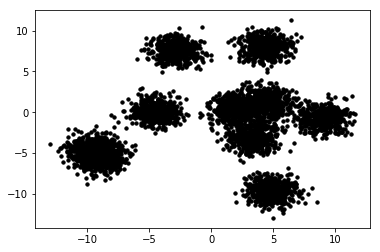

In [3]:
# Visualizing the data

f1 = data['X1'].values
f2 = data['X2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=11)

## 1b)
I can see 7 distinct clusters.
But we can definitely try for clusters = 4,5,6,7,8,9

## 2a)

In [4]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

#kmeans=KMeans()
#kmeans.labels_
#kmeans.cluster_centers_
#kmeans.inertia_

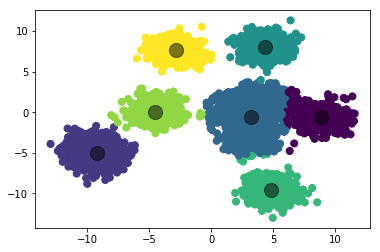

In [5]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## 2b)

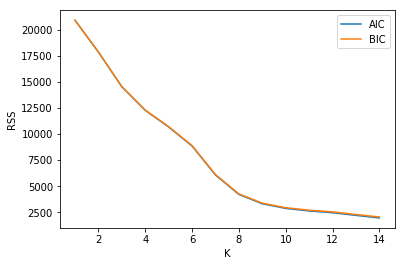

In [6]:
a = []
b = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    RSS= kmeans.inertia_
    n=len(data)
    aic= 2*k + n*math.log(RSS/n)
    a.append(aic)
    bic = n*math.log(RSS/n) + k*math.log(n)
    b.append(bic)
plt.figure()
plt.plot(range(1,15), a,label='AIC')
plt.plot(range(1,15),b,label='BIC')
plt.legend()
plt.xlabel("K")
plt.ylabel("RSS")
plt.show()

## 2c)

optimal K coming out to be 8 as after 8 the SSE explained with each unit increase in k, increases by less and less.  


Optimal K(8) is one less than the one that was predicted in before

## 2. K-Nearest Neighbor Classifiication

In [7]:
# Importing the dataset and labeling it as training or testing 

data2_train = pd.read_csv('knn_train.csv')
xtrain=data2_train.iloc[:,0:2]
ytrain=data2_train.iloc[:,2]

data2_val = pd.read_csv('knn_val.csv')
xval=data2_val.iloc[:,0:2]
yval=data2_val.iloc[:,2]

data2_test = pd.read_csv('knn_test.csv')
xtest=data2_test.iloc[:,0:2]
ytest=data2_test.iloc[:,2]

data2_train.head(6)

,X1,X2,y
0,-8.349319,-5.440823,0
1,-3.346695,0.774142,1
2,3.188065,1.406896,7
3,-4.849551,-1.253043,1
4,4.971391,1.022228,7
5,4.404151,-9.596679,3


## 1a)

In [8]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Training the model using the training set
clf_knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
# Predicting Output
pred_val= clf_knn.predict(xval) 

print("Accuracy:",metrics.accuracy_score(yval, pred_val))

Accuracy: 0.90625


In [10]:
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(xtrain,ytrain)
pred_val= clf_knn.predict(xval) 
print("Accuracy:",metrics.accuracy_score(yval, pred_val))

Accuracy: 0.9175


## 1b)

Reporting the classification accuracy of this model on the validation set for different values for k. 

In [11]:
def c_knn(i):
    c_knn = KNeighborsClassifier(n_neighbors=i)
    c_knn.fit(xtrain,ytrain)
    pred_val= c_knn.predict(xval) 
    return metrics.accuracy_score(yval, pred_val)

In [12]:
c_knn(3)

0.90625

In [13]:
c_knn(8)

0.91

In [14]:
c_knn(12)

0.915

In [15]:
# Plotting these accuracies against k and report the optimal value for k. 

k_range=range(1,15)
acc={}
acc_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    pred_val=knn.predict(xval)
    acc[k]=metrics.accuracy_score(yval,pred_val)
    acc_list.append(metrics.accuracy_score(yval,pred_val))

Text(0,0.5,'Testing Accuracy')

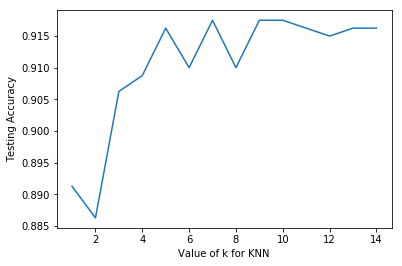

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting the relationship between K and the testing accuracy

plt.plot(k_range,acc_list)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy")

optimal k is coming out to be 7 or 9

Optimal K is 7

## 1c)
Reporting the classification accuracy of this model on the data using the optimal value of k that we found in 1b.

In [17]:
clf_knn_opt = KNeighborsClassifier(n_neighbors=7)
clf_knn_opt.fit(xtrain,ytrain)
pred_val= clf_knn_opt.predict(xval) 
print("Accuracy:",metrics.accuracy_score(yval, pred_val))

Accuracy: 0.9175


## 3. Decision Tree Classifier

In [18]:
#importing the dataset and labeling it as training or testing 
data3_train = pd.read_csv('titanic_train.csv')

In [19]:
data3_train.info(verbose = True, null_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
Survived      498 non-null int64
Pclass        498 non-null int64
Sex           498 non-null int64
Age           498 non-null int64
Parch         498 non-null int64
Fare          498 non-null float64
Embarked      498 non-null int64
Has_Cabin     498 non-null int64
FamilySize    498 non-null int64
IsAlone       498 non-null int64
Title         498 non-null int64
dtypes: float64(1), int64(10)
memory usage: 42.9 KB


## 1a)

In [20]:
print(data3_train.shape)
data3_train.head(6)

(498, 11)


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,1,0,24,0,69.3000,1,1,1,1,3
1,0,3,0,3,1,21.0750,0,0,5,0,4
2,1,3,0,16,0,7.7333,2,0,1,1,4
3,1,3,1,32,0,56.4958,0,0,1,1,1
4,0,3,1,22,0,7.1250,0,0,1,1,1
5,0,3,1,32,0,7.5500,0,0,1,1,1


*For training data* : datapoints=498 ; features=11

In [21]:
data3_val = pd.read_csv('titanic_val.csv')
print(data3_val.shape)

(125, 11)


*For Validation data*: datapoints=125 ;features=11

In [22]:
data3_test = pd.read_csv('titanic_test.csv')
print(data3_test.shape)

(268, 10)


*For Testing data* : datapoints=268 ; features=10

## 1b)

In [23]:
print(data3_train["Age"].mean())
print(data3_train["Fare"].mean())
#data3_train.describe() 

28.983935742971887
30.335198594377495


Average age of passengers=28.98

Average fare for passengers=30.33

In [24]:
#getting labels and features for training data 
xtrain=data3_train.iloc[:,1:11]
ytrain=data3_train.iloc[:,0]

#getting labels and features for validation data 
xval=data3_val.iloc[:,1:11]
yval=data3_val.iloc[:,0]

#getting labels and features for testing data 
xtest=data3_test.iloc[:,0:10]

In [25]:
xtrain.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,24,0,69.3000,1,1,1,1,3
1,3,0,3,1,21.0750,0,0,5,0,4
2,3,0,16,0,7.7333,2,0,1,1,4
3,3,1,32,0,56.4958,0,0,1,1,1
4,3,1,22,0,7.1250,0,0,1,1,1


In [26]:
len_train = len(xtrain.Title)
len_val=len(xval.Title)
X_train_test = pd.concat([xtrain.Title, xval.Title, xtest.Title])
X_train_test_ohe = pd.get_dummies(X_train_test, drop_first=True)

# Separate them again into train and test
X_train_ohe, X_val_ohe, X_test_ohe = X_train_test_ohe.iloc[:len_train, :], X_train_test_ohe.iloc[len_train:len_val+len_train, :],X_train_test_ohe.iloc[len_val+len_train:, :] 

In [27]:
X_train_ohe.head()
X_train_ohe.shape

(498, 4)

In [28]:
X_val_ohe.head()
X_val_ohe.shape

(125, 4)

In [29]:
X_test_ohe.head()
X_test_ohe.shape

(268, 4)

In [30]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(xtrain.Pclass, prefix="Pclass")
embarked_dummies = pd.get_dummies(xtrain.Embarked, prefix="Embarked")

# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([xtrain, pclass_dummies, X_train_ohe, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)
xtrain=titanic_dummies
xtrain.head()
#xtrain.shape

,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,2,3,4,5,Embarked_0,Embarked_1,Embarked_2
0,0,24,0,69.3000,1,1,1,1,0,0,0,1,0,0,0,1,0
1,0,3,1,21.0750,0,5,0,0,0,1,0,0,1,0,1,0,0
2,0,16,0,7.7333,0,1,1,0,0,1,0,0,1,0,0,0,1
3,1,32,0,56.4958,0,1,1,0,0,1,0,0,0,0,1,0,0
4,1,22,0,7.1250,0,1,1,0,0,1,0,0,0,0,1,0,0


In [31]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(xval.Pclass, prefix="Pclass")
embarked_dummies = pd.get_dummies(xval.Embarked, prefix="Embarked")

# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([xval, pclass_dummies, X_val_ohe, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)
xval=titanic_dummies
xval.head()
#xval.shape

,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,2,3,4,5,Embarked_0,Embarked_1,Embarked_2
0,0,24,0,15.8500,0,2,0,0,0,1,0,1,0,0,1,0,0
1,0,24,0,13.0000,1,1,1,0,1,0,0,0,1,0,1,0,0
2,1,40,1,15.5000,0,3,0,0,0,1,0,0,0,0,0,0,1
3,1,33,0,23.2500,0,3,0,0,0,1,0,0,0,0,0,0,1
4,0,3,2,41.5792,0,4,0,0,1,0,0,0,1,0,0,1,0


In [32]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(xtest.Pclass, prefix="Pclass")
embarked_dummies = pd.get_dummies(xtest.Embarked, prefix="Embarked")

# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([xtest, pclass_dummies, X_test_ohe, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)
xtest=titanic_dummies
xtest.head()
#xtest.shape

,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,2,3,4,5,Embarked_0,Embarked_1,Embarked_2
0,1,27,1,15.2458,0,3,0,0,0,1,1,0,0,0,0,1,0
1,1,31,0,10.5000,0,1,1,0,1,0,0,0,0,0,1,0,0
2,1,20,0,7.9250,0,1,1,0,0,1,0,0,0,0,1,0,0
3,0,6,1,33.0000,0,2,0,0,1,0,0,0,1,0,1,0,0
4,0,14,0,11.2417,0,2,0,0,0,1,0,0,1,0,0,1,0


In [33]:
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(498, 17)
(125, 17)
(268, 17)


In [34]:
data3_train.info()
#fare dtype -> float
#have to convert this in int form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
Survived      498 non-null int64
Pclass        498 non-null int64
Sex           498 non-null int64
Age           498 non-null int64
Parch         498 non-null int64
Fare          498 non-null float64
Embarked      498 non-null int64
Has_Cabin     498 non-null int64
FamilySize    498 non-null int64
IsAlone       498 non-null int64
Title         498 non-null int64
dtypes: float64(1), int64(10)
memory usage: 42.9 KB


In [35]:
# Converting data for fare numeric

data = [data3_train,data3_val,data3_test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)


## 2a)

In [36]:
decision_tree = DecisionTreeClassifier(max_depth=3) 
decision_tree.fit(xtrain, ytrain)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2b)

In [37]:
pred_val = decision_tree.predict(xval)  
print("Accuracy:",metrics.accuracy_score(yval, pred_val))

Accuracy: 0.832


In [38]:
def dt(i):
    dt = DecisionTreeClassifier(max_depth=3) 
    dt.fit(xtrain, ytrain) 
    pred_val = dt.predict(xval)  
    return metrics.accuracy_score(yval, pred_val)

In [39]:
dt(10)

0.832

In [40]:
dt(18)

0.832

In [41]:
# Tried running from k=1 through 10 and record testing accuracy
md=range(1,10)
acc={}
acc_list=[]
for m in md:
    decision_tree = DecisionTreeClassifier(max_depth=m) 
    #knn=KNeighborsClassifier(n_neighbors=k)
    decision_tree.fit(xtrain,ytrain)
    pred_val=decision_tree.predict(xval)
    acc[m]=metrics.accuracy_score(yval,pred_val)
    acc_list.append(metrics.accuracy_score(yval,pred_val))
    

Text(0,0.5,'Testing Accuracy')

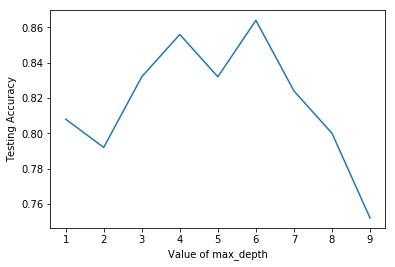

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting the relationship between K and the testing accuracy
plt.plot(md,acc_list)
plt.xlabel("Value of max_depth")
plt.ylabel("Testing Accuracy")

# optimal k is coming out to be 4 or 6

In [43]:
# Combining training and validation data to train our classifier on it

combinedx=xtrain.append(xval)
combinedy=ytrain.append(yval)
print(combinedx.shape)
print(combinedy.shape)
#(623, 11)
#623=498+125 

(623, 17)
(623,)


In [44]:
decision_tree = DecisionTreeClassifier(max_depth=6) 
decision_tree.fit(combinedx, combinedy) 
pred_test = decision_tree.predict(xtest)
df_dt = pd.DataFrame(pred_test)
df_dt.head(3)

,0
0,0
1,0
2,0


In [45]:
df_dt.to_csv('F003KYJ_dt_prediction.csv', encoding='utf-8', header=False, index=False)

## 4. Random Forest Classification

## 1)

In [46]:
random_forest = RandomForestClassifier()
random_forest.fit(xtrain, ytrain)

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 2)

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100, 150, 200], 'max_depth': [1,4,7,10]}
grid_search = GridSearchCV(random_forest, parameters, cv=10)
grid_search.fit(xtrain, ytrain)
grid_search.best_params_

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 7, 'n_estimators': 150}

Optimum parameters came out to be max_depth=10 and n_estimators =150

## 3)

In [48]:
#validate using combine
random_forest_validate = RandomForestClassifier(n_estimators=150, max_depth=10)
KF = KFold(n_splits=10)
scores = cross_val_score(random_forest_validate, combinedx, combinedy, cv=KF)
avg_score = np.mean(scores)
print(avg_score)

0.8330261136712748


In [49]:
random_forest_validate.fit(combinedx,combinedy)
pred_test = random_forest_validate.predict(xtest)
df_rf = pd.DataFrame(pred_test)
df_rf.head(3)

,0
0,1
1,0
2,0


In [50]:
df_rf.to_csv('F003KYJ_rf_prediction.csv', encoding='utf-8', header=False, index=False)

## SVM Classification

## 1)

Linear kernel

In [51]:
lin = SVC(kernel='linear')
lin.fit(xtrain, ytrain)
pred_val = lin.predict(xval) 
print("Accuracy for Linear SVM:",metrics.accuracy_score(yval, pred_val))

Accuracy for Linear SVM: 0.856


Polynomial kernel

In [52]:
poly = SVC(kernel='poly',degree=2)
poly.fit(xtrain, ytrain)
pred_val = poly.predict(xval) 
print("Accuracy for Polynomial SVM:",metrics.accuracy_score(yval, pred_val))

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for Polynomial SVM: 0.848


RBF kernel

In [53]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10, 100], 'gamma': [0.0001,0.001,0.01,0.1,1,10]}
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(xtrain, ytrain)
grid_search.best_params_

/Users/deepanshishokeen/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 100, 'gamma': 0.001}

In [54]:
rbf = SVC(kernel='rbf',C=100, gamma=0.001)
rbf.fit(xtrain, ytrain)
pred_val = rbf.predict(xval) 
print("Accuracy:",metrics.accuracy_score(yval, pred_val))

Accuracy: 0.784


## 2)

best accuracy is coming with linear SVM

In [55]:
lin.fit(xtrain, ytrain)
pred_test = lin.predict(xtest)
df_svm = pd.DataFrame(pred_test)
df_svm.head(3)

,0
0,1
1,0
2,0


In [56]:
df_svm.to_csv('F003KYJ_svm_prediction.csv', encoding='utf-8', header=False, index=False)